<a href="https://colab.research.google.com/github/TGMAPA/ML-KNN/blob/main/nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INSTITUTO TECNOLÓGICO Y DE ESTUDIOS SUPERIORES DE MONTERREY


ESCUELA DE INGENIERÍA Y CIENCIAS
“Actividad 1 KNN con Scikit learn y manual”


MATERIA
Inteligencia artificial avanzada para la ciencia de datos I


ESTUDIANTES
Miguel Ángel Pérez Ávila - A01369908

PROFESOR
Dr. Esteban Castillo Juarez


FECHA DE ENTREGA
26/08/2025
                                                                                    

# **1. Introducción**
EL presente proyecto pretende comparar la aplicación del algoritmo de Machine Learning KNN para realizar la clasificación de un conjunto de datos sobre la existencia de un diagnostco positivo o negarivo para una enfermedad cardiaca dados ciertas caracterísitcas del paciente. Se muestra la implemetación del algoritmo de forma completamente manual y algunas métricas de rendimiento, por otro lado se presenta la implementación del algoritmo mediante las herramientas de Scikit-Learn para el cuál se muestsran los resultados obtenidos. El objetivo es encontrar los hiperparámetros apropiados para conseguir un modelo que realiza la clasificación de una nueva muestra insertada en el espacio con el menor error porsible de acuerdo con un conjunto de datos para la prueba y el entrenamiento del modelo.

**ES SUMAMENTE IMPORTANTE MENCIONAR QUE PARA LA CORRECTA VISUALIZACIÓN DE GRÁFICAS DINÁMICAS CONSTRUIDAS CON PLOTLY EXPRESS ES RECOMENDABLE VISUALIZAR EL NOTEBOOK DIRECTAMENTE DESDE EL ARCHIVO .ipynb**

# 2. **Experimentación y Enfoque del Problema**
Concretamente, el problema de clasificación propuesto es el de identificar si un paciente presenta o no una enfermedad cardíaca a partir de 14 características clínicas y demográficas contenidas en el dataset del repositorio UCI.

Se detallan los pasos experimentales:

1. Implementación del algoritmo KNN manualmente con tres medidas de similitud (euclidiana, Manhattan y coseno).

2. Variación del hiperparámetro K en un rango de valores para observar su impacto en el rendimiento.

3. Evaluación del modelo generado y graficación.

4. Implementación en Scikit-Learn, con tres medidas de similitud (euclidiana, Manhattan y coseno).

5. Variación del hiperparámetro K en un rango de valores para observar su impacto en el rendimiento.

6. Evaluación del modelo generado y graficación.

El enfoque consiste en analizar cómo cambia el desempeño del clasificador según la métrica de distancia y el número de vecinos, con el objetivo de encontrar la mejor configuración posible.

Además se realiza la prueba de omitir ciertas características del dataset con el fin de obtener de manera "fuerza bruta" una mejor precisión del modelo al elimiar alguna característica poco significante.

# 3. **Implementación Manual**
A continuación se presenta la implementación del algoritmo KNN de forma completamente manual, así como las herramientas necesarias para automatizar la prueba de hiperparámetros para evaluar el rendimiento de los modelos obtenidos al final.

## 3.1. Importación de librerias
Se importaron las librerías esenciales:

- NumPy y Math para operaciones matemáticas.
- Pandas y Codecs para la manipulación de datos.
- Matplotlib y Plotly para la generación de gráficos.
- Scikit-learn únicamente como apoyo en la visualización de matrices de confusión y cálculo de métricas de confusión.
- Entre otras.

In [ ]:
#Import a mathematical library
import numpy as np
#Import a file manipulation library
import codecs
#Import a mathematical library
import math
#Import iterable manipulation function
from operator import itemgetter
#Import statistics variable
from statistics import mode
# Matplotlib for graphs
import matplotlib.pyplot as plt
# Sklearn metrics
from sklearn.metrics import confusion_matrix
# Plotly for graphs
import plotly.graph_objects as go
import plotly.express as px
imagesDirPath = "./images/"
# Pandas dataframes
import pandas as pd

## 3.2. Funciones de Similitud
Se implementaron tres funciones de distancia:

- **Euclidiana** → mide la raíz cuadrada de la suma de las diferencias al cuadrado.
- **Manhattan** → mide la suma de las diferencias absolutas entre las coordenadas.
- **Coseno** → mide la similitud angular entre dos vectores.

Estas funciones permiten evaluar la sensibilidad del clasificador frente a diferentes criterios de proximidad.

### 3.2.1. Distancia Euclideana

In [ ]:
"""
Python function that calculates the similarity between two Python lists (vectors) using Euclidean Distance Method as:
    euclideanDistance = sqrt((A1-B1)² + (A2-B2)² + ... + (An-Bn)²)
Inputs:
- list (list1)
- list (list2)
Output:
- float (similarity)
"""
def euclideanDistance(list1, list2):
    sumList=0
    for x, y in zip(list1, list2):
        sumList=sumList+((y - x) ** 2)
    return math.sqrt(sumList)

In [ ]:
# --- Euclidian Distance Examples

# Similar Vectors
x = np.array([12, 13, 15, 16])
y = np.array([12, 13, 15, 16])
print(euclideanDistance(x, y))

# Less Similarity between Vectors
x = np.array([-12, -13, -15, -16])
y = np.array([12, 13, 15, 16])
print(euclideanDistance(x, y))

0.0
56.356011214421486


### 3.2.2. Distancia de Manhattan

In [ ]:
'''
Python function that calculates the similarity between two Python lists (vectors) using Manhattan Distance Method
Inputs:
- x : list()
- y : list()
Outputs:
- acum : float -> Similarity
'''
def manhattanDistance(x, y):
    acum=0
    for i in range(len(x)):
        acum = acum + (x[i] - y[i])
    return np.abs(acum)

In [ ]:
# --- MAnhattan Distance Examples

# Similar Vectors
x = np.array([12, 13, 15, 16])
y = np.array([12, 13, 15, 16])
print(manhattanDistance(x, y))

# Less Similarity between Vectors
x = np.array([-12, -13, -15, -16])
y = np.array([12, 13, 15, 16])
print(manhattanDistance(x, y))

0
112


### 3.2.3. Distancia Distancia de Coseno

In [ ]:
'''
Python function that calculates the magnitude of a Vector as:
    ||vector|| = sqrt(A1² + A2² + ... + An²)
Inputs:
- vector : np.array() | list()
Outputs:
- acum : float -> magnitude
'''
def vectorMagnitude(vector):
    acum = 0
    for i in range(len(vector)):
        acum = acum + (vector[i]**2)
    return np.sqrt(acum)

'''
Python function that calculates the similarity between two Python lists (vectors) using Minkowsky Distance Method
Similitud de coseno = (A · B) / (||A|| x ||B||)
Inputs:
- x : np.array() | list()
- y : np.array() | list()
Outputs:
- cosDis : float -> Similarity where -1<cosDis<1
'''
def cosineDistance(x, y):
    cosDis = (np.dot(x, y) / ( vectorMagnitude(x) * vectorMagnitude(y)))
    return cosDis

In [ ]:
# --- Cosine Distance Examples

# Similar Vectors where cosineDistance is closer to 1
x = np.array([12, 13, 15, 16])
y = np.array([12, 13, 15, 16])
print(cosineDistance(x, y))

# Less Similarity between Vectors where cosineDistance is closer to -1
x = np.array([-12, -13, -15, -16])
y = np.array([12, 13, 15, 16])
print(cosineDistance(x, y))

0.9999999999999999
-0.9999999999999999


## 3.3. Lectura de Archivo de Entrada
El conjunto de datos se cargó desde un archivo de texto con 303 muestras y 14 atributos. Se procesaron las etiquetas para convertirlas en categorías (“Presence” o “Absence”), lo que permitió preparar la información para las pruebas.

In [ ]:
dataset=[]
path = "originalDataset.txt"

with codecs.open(path,"r","UTF-8") as file:
    for line in file:
        elements=(line.strip('\n')).split(",")
        temp=[float(x) for x in elements]
        if temp[-1]==0.0:
            temp[-1]="Absence"
        else:
            temp[-1]="Present"

        dataset.append(temp)

dataset = np.array(dataset, dtype=object)
print(dataset)

[[63.0 1.0 1.0 ... 0.0 6.0 'Absence']
 [67.0 1.0 4.0 ... 3.0 3.0 'Present']
 [67.0 1.0 4.0 ... 2.0 7.0 'Present']
 ...
 [57.0 1.0 4.0 ... 1.0 7.0 'Present']
 [57.0 0.0 2.0 ... 1.0 3.0 'Present']
 [38.0 1.0 3.0 ... 0.0 3.0 'Absence']]


In [ ]:
def uniqueValuesFrequencyInMatrix(matrix, indexIfMatrix = -1):
    valuesFreq = {}
    for i in range(len(matrix)):
        currentSample = matrix[i][indexIfMatrix]
        if currentSample not in valuesFreq.keys():
            valuesFreq[currentSample]=1
        else:
            valuesFreq[currentSample]+=1
    return valuesFreq

# Values frequency
print(uniqueValuesFrequencyInMatrix(dataset, -1))

{'Absence': 164, 'Present': 139}


## 3.4. Separación en TrainingSet y TestSet
Se implementó una función que divide el dataset en entrenamiento y prueba, con opción de balancear las clases para evitar sesgos y garantizar que ambas categorías estén representadas de manera equitativa.

In [ ]:
"""
Define a Python function that given a samples matrix, divide in Train and test sets from a datasets
Inputs:
- dataset : np.array()
- trainPercentage : float() -> Percentage between 0.0-1.0
- tagColumnIndex  : int()
- balance : bool()
- shuffle : bool()
Outputs:
- TrainX : np.array()
- TrainY : np.array()
- TestX  : np.array()
- TestY  : np.array()
"""
def divideTrainAndTest(dataset, trainPercentage, tagColumnIndex, balance = True, shuffle = True):
    # Test Percentage Calculation
    testPercentage = 1 - trainPercentage

    # X and Y test/training sets
    TrainX, TestX, TrainY, TestY = np.array([], dtype="float"), np.array([], dtype="float"), np.array([], dtype="str"), np.array([], dtype="str")

    if(not balance):
        # Get samples index for dataset separation
        separatorIndex = int(trainPercentage*len(dataset))

        if(shuffle):
            np.random.shuffle(dataset)

        TrainY = dataset[:separatorIndex, len(dataset[0])-1]
        TrainX = dataset[:separatorIndex, :tagColumnIndex]
        TestY = dataset[separatorIndex:, len(dataset[0])-1]
        TestX = dataset[separatorIndex:, :tagColumnIndex]

    else:
        # Struct: "uniqueValue" : [samplesArray]
        dividedSamples = {}

        for i in range(len(dataset)):
            value = dataset[i][-1]
            if value not in dividedSamples.keys():
                dividedSamples[value] = [dataset[i]]
            else:
                dividedSamples[value].append(dataset[i])
        # ex. dividedSamples.keys() -> dict_keys(['Absence', 'Present'])

        # Dict for length storing
        category_lengths = {}

        # Total of tag's Categories
        n_categs = len(dividedSamples.keys())

        # Calculate each category length based on training Percentage in a Balanced Way
        for category in dividedSamples.keys():
            category_lengths[category] = {"train":int(trainPercentage*len(dataset)/n_categs), "test":int(testPercentage*len(dataset)/n_categs)}

        # Train And Test Sets with no X and Y division
        Train, Test = [], []

        for category in dividedSamples.keys():
            # Fill Train X and Y with n number of samples of current cateogry (n: category_lengths[category]["train"])
            Train = Train + dividedSamples[category][:category_lengths[category]["train"]]
            Test  = Test + dividedSamples[category][:category_lengths[category]["test"]]

        # List() to np.array cast and shuffle arrays
        Train = np.array(Train)
        Test = np.array(Test)
        np.random.shuffle(Train)
        np.random.shuffle(Test)

        # Traini X and Y separation
        TrainY = Train[:, tagColumnIndex]
        TrainX = Train[:, :tagColumnIndex]
        TestY = Test[:, tagColumnIndex]
        TestX = Test[:, :tagColumnIndex]

    return TrainX, TrainY, TestX, TestY



A continuación se realiza la división el dataset utilizando el 80% para el entrenamiento y el sobrane (20%) para las pruebas. Además se realiza el balance para ambos conjuntos de datos para tener la misma frequencia de cada categoría y lograr un mejor entrenamiento.

In [ ]:
# Divide Dataset
TrainX, TrainY, TestX, TestY = divideTrainAndTest(dataset, trainPercentage = 0.8, tagColumnIndex= -1, balance= True, shuffle= True)

print(f"TrainX Shape : {np.array(TrainX).shape}  | TrainY Shape: {np.array(TrainY).shape}")
print(f"TestX Shape  : {np.array(TestX).shape}  | TestY Shape: {np.array(TestY).shape}")

# Verify balanced values
TrainY_unique_values, TrainY_counts = np.unique(TrainY, return_counts=True)
print("Balanced TrainY Set : ", )
for i in range(len(TrainY_unique_values)):
    print("- Value: ", TrainY_unique_values[i], "  |  ", TrainY_counts[i])

TestY_unique_values, TestY_counts = np.unique(TestY, return_counts=True)
print("Balanced TestY Set : ", )
for i in range(len(TestY_unique_values)):
    print("- Value: ", TestY_unique_values[i], "  |  ", TestY_counts[i])

TrainX Shape : (242, 13)  | TrainY Shape: (242,)
TestX Shape  : (60, 13)  | TestY Shape: (60,)
Balanced TrainY Set : 
- Value:  Absence   |   121
- Value:  Present   |   121
Balanced TestY Set : 
- Value:  Absence   |   30
- Value:  Present   |   30


## 3.5. Función de Clasificación
Se desarrolló la función principal del algoritmo KNN:

- Calcula las distancias entre la muestra a clasificar y todas las instancias de entrenamiento.
- Selecciona los K vecinos más cercanos.
- Asigna la clase más frecuente (con manejo especial de empates) mediante la implementación de la función decideTagWhenDraw.

In [ ]:
"""
Python function that decides randomly between the most frequent categories inside k Neighs
Input:
- array
Output:
- DecidedCategory
"""
def decideTagWhenDraw(array):
    # Get unique values and their corresponding counts
    unique_values, counts = np.unique(array, return_counts=True)

    maxFreqCategory = []
    maxFreq = 0

    for i in range(len(counts)):
        if counts[i] > maxFreq: # New max Frequency
            maxFreq = counts[i] # update new max Frequency
            maxFreqCategory = [unique_values[i]] # Update new max Frequency's category
        elif counts[i] == maxFreq:
            maxFreqCategory.append(unique_values[i]) # Append Category with same frequency as maximum

    if len(maxFreqCategory)>1: # Theres a draw of categories with same max frequency
        randIndexChoice = np.random.choice(len(maxFreqCategory))

        # return a random from the categories with max Freq
        return maxFreqCategory[randIndexChoice]
    else:
        # return single mode
        return maxFreqCategory[0]

"""
Define a Python function that given a test vector, calculates the K nerest neighborgs from
trining and assignates the majority label to test
Input: list - testList
Input: list of lists (trainingLists)
Input: list (trainingLabels)
Input: integer (k)
Output: string (prediction label)
"""
def classify(testList, trainingLists, trainingLabels, k, similarityMeasure = "euclidean"):
    distance=[]

    #For every list in our dataset:
    for trainingList, label in zip(trainingLists,trainingLabels):
        #Calculate the distance between test list and the current trainig list

        if similarityMeasure == "euclidean":
            value=euclideanDistance(testList,trainingList)
        elif similarityMeasure == "manhattan":
            value = manhattanDistance(testList, trainingList)
        elif similarityMeasure == "cosine":
            value = cosineDistance(testList, trainingList)

        distance.append((value,label))

    #Sort the distances in increasing order
    distance.sort(key=itemgetter(0))
    votelabels=[]

    #Take k items with lowest distances to test list
    for x in distance[:k]:
        votelabels.append(x[1])

    resultTag = decideTagWhenDraw(votelabels)
    #
    #Find the majority class among these items and return the majority class as prediction
    return mode(votelabels)

Se programó una función general para evaluar de manera sistemática el rendimiento del clasificador bajo diferentes configuraciones:

- Rango de K: entre 3 y 40 vecinos.
- Medidas de similitud: euclidiana, Manhattan y coseno.

La función registró los resultados obtenidos para cada configuración, lo que permitió posteriormente identificar el valor de K que maximizaba el desempeño en cada caso.

In [ ]:
"""
Define a Python function for testing a range of kValues and different similMeasures through the knn model and get each of their acurracy values
Inputs:
- TrainX : np.array()
- TrainY : np.array()
- TestX  : np.array()
- TestY  : np.array()
- maxK   : int()
- minK   : int()
- similMeasures : list() -> SimilMeasures to Test
Outputs:
- Accuracy
"""
def executeTesting(TestX, TestY, TrainX, TrainY, maxK, minK, similMeasures = ["euclidean", "manhattan", "cosine"]):
    #Apply the KNN approach over test samples using training data
    print("Apply the KNN approach over test samples...")

    # Dict() that stores Acurracy vector through k_value range for every similariy Measure
    Acurracy = {}

    # Classify using each similariy measure
    for dx_measure in similMeasures:
        # Accuracy list for current similariy measure
        currentAcurracy = []
        currentYPredicted = []
        currentYTruth = []

        # Test every k value defined by a range
        for k in range(minK, maxK):
            correctPredictions=0
            TotalPredictions=0
            auxYPredicted = []
            auxYTruth = []

            # Evaluate and classify every testSet's sample
            for x,y in zip (TestX, TestY):
                # Predictions counter
                TotalPredictions=TotalPredictions+1

                # Classification: keeping mode tag between k nearest samples to current sample
                predicted=classify(x, TrainX, TrainY, k, dx_measure)

                auxYPredicted.append(predicted) # Save predicted value
                auxYTruth.append(y) # Save Truth Value

                if predicted==y:
                    # Correct Predictions counter
                    correctPredictions+=1

            #Calculates model accuracy
            acurracy= correctPredictions/TotalPredictions

            # Save current K acurracy
            currentAcurracy.append(acurracy)

            # Save current Y_predicted vector for current k value
            currentYPredicted.append(auxYPredicted)

            # Save current Y_truth vector for current k value
            currentYTruth.append(auxYTruth)

        # Add to dict where:
        # Acurracy Struct -> Acurracy["euclidean" | "manhattan" | "cosine"][0: Acurracy, 1: Ypredicted, 2: YTRuth][indexed: K_value_tested]
        Acurracy[dx_measure] = (currentAcurracy, currentYPredicted, currentYTruth)

    return Acurracy


## 3.6. Pruebas de Clasificación
Se realizaron diferentes pruebas para evaluar el desempeño del modelo:

### 3.6.1. Prueba de Clasificación Considerando el Vector de Características Completo
Se presenta el algoritmo entrenado y probado considerando la totalidad de las características.

In [ ]:
# K_value range
minK = 3
maxK = 40

# K_Values Array
k_values = np.arange(minK,maxK)

# Similarity Measures
similMeasures = ["euclidean", "manhattan", "cosine"]

# Test classification using a k_value range and desired similMeasures
Acurracy = executeTesting(TestX, TestY, TrainX, TrainY, maxK, minK, similMeasures)


# Show best values for k for each distance measure
for key in Acurracy.keys():
    print(f"Best Accuracy for {key} method was : {max(Acurracy[key][0])} with k: {k_values[Acurracy[key][0].index(max(Acurracy[key][0]))]}")

Apply the KNN approach over test samples...
Best Accuracy for euclidean method was : 0.9 with k: 4
Best Accuracy for manhattan method was : 0.9166666666666666 with k: 4
Best Accuracy for cosine method was : 0.48333333333333334 with k: 3


#### 3.6.1.1. Graficación

##### 3.6.1.1.1. Acurracy vs K_values

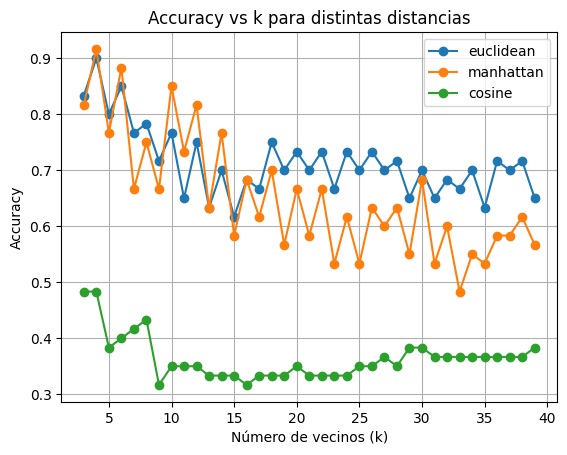

In [ ]:
# Graph 1
for i in similMeasures:
    # Plot every acurracy vector for each similarity measure
    plt.plot(k_values, Acurracy[i][0], label=i, marker="o")
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k para distintas distancias")
plt.legend()
plt.grid(True)
plt.show()

##### 3.6.1.1.2. Matrices de Confusión

In [ ]:
# Function for manual calculation of confusion matrix
def calcCondusionMatrix2Categories(Y_truh, Y_pred):
    TruthPositive = 0
    TruthNegative = 0
    FalsePositive = 0
    FalseNegative = 0

    for y_truth, y_pred in zip(Y_truh, Y_pred):
        if(y_truth == "Present" and y_pred == "Present"): # Truth Positive
            TruthPositive+=1
        elif(y_truth == "Absence" and y_pred == "Present"): # FAlse Positive
            FalsePositive+=1
        elif(y_truth == "Present" and y_pred == "Absence"): # False Negative
            FalseNegative+=1
        elif(y_truth == "Absence" and y_pred == "Absence"): # Truth Negative
            TruthNegative+=1

    print("TruthPositive: ", TruthPositive)
    print("TruthNegative: ", TruthNegative)
    print("FalsePositive: ", FalsePositive)
    print("FalseNegative: ", FalseNegative)

    return np.array([[TruthNegative, FalseNegative], [FalsePositive, TruthPositive]]).T

In [ ]:
# Graph 2

# Matrix Label
labels = ["Absence", "Present"]

# Create confusion matrix for each distance measure
for i in similMeasures:
    # Create matrix using (y , y_predicted)
    for k in range( len(k_values)):

        # Manual 2d ConfusionMatrix
        manualCm = calcCondusionMatrix2Categories(Acurracy[i][2][k], Acurracy[i][1][k])

        # Sklearn confusionMatrix
        cm = confusion_matrix(Acurracy[i][2][k], Acurracy[i][1][k])

        matrix2Graph = cm

        # Create heatmap
        fig = go.Figure(data=go.Heatmap(
            z=matrix2Graph,
            x=labels,  # Column labels
            y=labels,  # Row labels
            colorscale="Blues",
            text=matrix2Graph,  # Show measures inside boxes
            texttemplate="%{text}",  # Text Format
        ))

        # Figure settings
        fig.update_layout(
            title=f"Matriz de Confusión - Distancia '{i}' - k: {k+(min(k_values))} - Acurracy: {Acurracy[i][0][k]}",
            xaxis_title="Predicción",
            yaxis_title="Real",
            width=1000,
            height=300
        )

        fig.update_yaxes(autorange="reversed")

        # Show graph
        fig.show()

TruthPositive:  24
TruthNegative:  26
FalsePositive:  4
FalseNegative:  6


TruthPositive:  26
TruthNegative:  28
FalsePositive:  2
FalseNegative:  4


TruthPositive:  22
TruthNegative:  26
FalsePositive:  4
FalseNegative:  8


TruthPositive:  23
TruthNegative:  28
FalsePositive:  2
FalseNegative:  7


TruthPositive:  22
TruthNegative:  24
FalsePositive:  6
FalseNegative:  8


TruthPositive:  22
TruthNegative:  25
FalsePositive:  5
FalseNegative:  8


TruthPositive:  20
TruthNegative:  23
FalsePositive:  7
FalseNegative:  10


TruthPositive:  22
TruthNegative:  24
FalsePositive:  6
FalseNegative:  8


TruthPositive:  18
TruthNegative:  21
FalsePositive:  9
FalseNegative:  12


TruthPositive:  21
TruthNegative:  24
FalsePositive:  6
FalseNegative:  9


TruthPositive:  17
TruthNegative:  21
FalsePositive:  9
FalseNegative:  13


TruthPositive:  20
TruthNegative:  22
FalsePositive:  8
FalseNegative:  10


TruthPositive:  17
TruthNegative:  20
FalsePositive:  10
FalseNegative:  13


TruthPositive:  19
TruthNegative:  22
FalsePositive:  8
FalseNegative:  11


TruthPositive:  18
TruthNegative:  22
FalsePositive:  8
FalseNegative:  12


TruthPositive:  20
TruthNegative:  25
FalsePositive:  5
FalseNegative:  10


TruthPositive:  18
TruthNegative:  24
FalsePositive:  6
FalseNegative:  12


TruthPositive:  20
TruthNegative:  24
FalsePositive:  6
FalseNegative:  10


TruthPositive:  19
TruthNegative:  23
FalsePositive:  7
FalseNegative:  11


TruthPositive:  20
TruthNegative:  24
FalsePositive:  6
FalseNegative:  10


TruthPositive:  18
TruthNegative:  22
FalsePositive:  8
FalseNegative:  12


TruthPositive:  21
TruthNegative:  23
FalsePositive:  7
FalseNegative:  9


TruthPositive:  20
TruthNegative:  22
FalsePositive:  8
FalseNegative:  10


TruthPositive:  21
TruthNegative:  23
FalsePositive:  7
FalseNegative:  9


TruthPositive:  19
TruthNegative:  23
FalsePositive:  7
FalseNegative:  11


TruthPositive:  19
TruthNegative:  24
FalsePositive:  6
FalseNegative:  11


TruthPositive:  19
TruthNegative:  20
FalsePositive:  10
FalseNegative:  11


TruthPositive:  19
TruthNegative:  23
FalsePositive:  7
FalseNegative:  11


TruthPositive:  18
TruthNegative:  21
FalsePositive:  9
FalseNegative:  12


TruthPositive:  19
TruthNegative:  22
FalsePositive:  8
FalseNegative:  11


TruthPositive:  19
TruthNegative:  21
FalsePositive:  9
FalseNegative:  11


TruthPositive:  20
TruthNegative:  22
FalsePositive:  8
FalseNegative:  10


TruthPositive:  17
TruthNegative:  21
FalsePositive:  9
FalseNegative:  13


TruthPositive:  20
TruthNegative:  23
FalsePositive:  7
FalseNegative:  10


TruthPositive:  20
TruthNegative:  22
FalsePositive:  8
FalseNegative:  10


TruthPositive:  20
TruthNegative:  23
FalsePositive:  7
FalseNegative:  10


TruthPositive:  18
TruthNegative:  21
FalsePositive:  9
FalseNegative:  12


TruthPositive:  25
TruthNegative:  24
FalsePositive:  6
FalseNegative:  5


TruthPositive:  27
TruthNegative:  28
FalsePositive:  2
FalseNegative:  3


TruthPositive:  20
TruthNegative:  26
FalsePositive:  4
FalseNegative:  10


TruthPositive:  25
TruthNegative:  28
FalsePositive:  2
FalseNegative:  5


TruthPositive:  22
TruthNegative:  18
FalsePositive:  12
FalseNegative:  8


TruthPositive:  24
TruthNegative:  21
FalsePositive:  9
FalseNegative:  6


TruthPositive:  23
TruthNegative:  17
FalsePositive:  13
FalseNegative:  7


TruthPositive:  26
TruthNegative:  25
FalsePositive:  5
FalseNegative:  4


TruthPositive:  23
TruthNegative:  21
FalsePositive:  9
FalseNegative:  7


TruthPositive:  27
TruthNegative:  22
FalsePositive:  8
FalseNegative:  3


TruthPositive:  21
TruthNegative:  17
FalsePositive:  13
FalseNegative:  9


TruthPositive:  25
TruthNegative:  21
FalsePositive:  9
FalseNegative:  5


TruthPositive:  19
TruthNegative:  16
FalsePositive:  14
FalseNegative:  11


TruthPositive:  22
TruthNegative:  19
FalsePositive:  11
FalseNegative:  8


TruthPositive:  19
TruthNegative:  18
FalsePositive:  12
FalseNegative:  11


TruthPositive:  22
TruthNegative:  20
FalsePositive:  10
FalseNegative:  8


TruthPositive:  16
TruthNegative:  18
FalsePositive:  12
FalseNegative:  14


TruthPositive:  20
TruthNegative:  20
FalsePositive:  10
FalseNegative:  10


TruthPositive:  16
TruthNegative:  19
FalsePositive:  11
FalseNegative:  14


TruthPositive:  17
TruthNegative:  23
FalsePositive:  7
FalseNegative:  13


TruthPositive:  13
TruthNegative:  19
FalsePositive:  11
FalseNegative:  17


TruthPositive:  15
TruthNegative:  22
FalsePositive:  8
FalseNegative:  15


TruthPositive:  13
TruthNegative:  19
FalsePositive:  11
FalseNegative:  17


TruthPositive:  15
TruthNegative:  23
FalsePositive:  7
FalseNegative:  15


TruthPositive:  15
TruthNegative:  21
FalsePositive:  9
FalseNegative:  15


TruthPositive:  17
TruthNegative:  21
FalsePositive:  9
FalseNegative:  13


TruthPositive:  15
TruthNegative:  18
FalsePositive:  12
FalseNegative:  15


TruthPositive:  19
TruthNegative:  22
FalsePositive:  8
FalseNegative:  11


TruthPositive:  14
TruthNegative:  18
FalsePositive:  12
FalseNegative:  16


TruthPositive:  16
TruthNegative:  20
FalsePositive:  10
FalseNegative:  14


TruthPositive:  13
TruthNegative:  16
FalsePositive:  14
FalseNegative:  17


TruthPositive:  14
TruthNegative:  19
FalsePositive:  11
FalseNegative:  16


TruthPositive:  13
TruthNegative:  19
FalsePositive:  11
FalseNegative:  17


TruthPositive:  13
TruthNegative:  22
FalsePositive:  8
FalseNegative:  17


TruthPositive:  13
TruthNegative:  22
FalsePositive:  8
FalseNegative:  17


TruthPositive:  15
TruthNegative:  22
FalsePositive:  8
FalseNegative:  15


TruthPositive:  14
TruthNegative:  20
FalsePositive:  10
FalseNegative:  16


TruthPositive:  2
TruthNegative:  27
FalsePositive:  3
FalseNegative:  28


TruthPositive:  2
TruthNegative:  27
FalsePositive:  3
FalseNegative:  28


TruthPositive:  7
TruthNegative:  16
FalsePositive:  14
FalseNegative:  23


TruthPositive:  6
TruthNegative:  18
FalsePositive:  12
FalseNegative:  24


TruthPositive:  10
TruthNegative:  15
FalsePositive:  15
FalseNegative:  20


TruthPositive:  10
TruthNegative:  16
FalsePositive:  14
FalseNegative:  20


TruthPositive:  10
TruthNegative:  9
FalsePositive:  21
FalseNegative:  20


TruthPositive:  10
TruthNegative:  11
FalsePositive:  19
FalseNegative:  20


TruthPositive:  11
TruthNegative:  10
FalsePositive:  20
FalseNegative:  19


TruthPositive:  11
TruthNegative:  10
FalsePositive:  20
FalseNegative:  19


TruthPositive:  11
TruthNegative:  9
FalsePositive:  21
FalseNegative:  19


TruthPositive:  11
TruthNegative:  9
FalsePositive:  21
FalseNegative:  19


TruthPositive:  11
TruthNegative:  9
FalsePositive:  21
FalseNegative:  19


TruthPositive:  10
TruthNegative:  9
FalsePositive:  21
FalseNegative:  20


TruthPositive:  11
TruthNegative:  9
FalsePositive:  21
FalseNegative:  19


TruthPositive:  11
TruthNegative:  9
FalsePositive:  21
FalseNegative:  19


TruthPositive:  11
TruthNegative:  9
FalsePositive:  21
FalseNegative:  19


TruthPositive:  11
TruthNegative:  10
FalsePositive:  20
FalseNegative:  19


TruthPositive:  11
TruthNegative:  9
FalsePositive:  21
FalseNegative:  19


TruthPositive:  11
TruthNegative:  9
FalsePositive:  21
FalseNegative:  19


TruthPositive:  11
TruthNegative:  9
FalsePositive:  21
FalseNegative:  19


TruthPositive:  11
TruthNegative:  9
FalsePositive:  21
FalseNegative:  19


TruthPositive:  12
TruthNegative:  9
FalsePositive:  21
FalseNegative:  18


TruthPositive:  12
TruthNegative:  9
FalsePositive:  21
FalseNegative:  18


TruthPositive:  13
TruthNegative:  9
FalsePositive:  21
FalseNegative:  17


TruthPositive:  12
TruthNegative:  9
FalsePositive:  21
FalseNegative:  18


TruthPositive:  14
TruthNegative:  9
FalsePositive:  21
FalseNegative:  16


TruthPositive:  14
TruthNegative:  9
FalsePositive:  21
FalseNegative:  16


TruthPositive:  14
TruthNegative:  8
FalsePositive:  22
FalseNegative:  16


TruthPositive:  13
TruthNegative:  9
FalsePositive:  21
FalseNegative:  17


TruthPositive:  13
TruthNegative:  9
FalsePositive:  21
FalseNegative:  17


TruthPositive:  13
TruthNegative:  9
FalsePositive:  21
FalseNegative:  17


TruthPositive:  13
TruthNegative:  9
FalsePositive:  21
FalseNegative:  17


TruthPositive:  13
TruthNegative:  9
FalsePositive:  21
FalseNegative:  17


TruthPositive:  13
TruthNegative:  9
FalsePositive:  21
FalseNegative:  17


TruthPositive:  13
TruthNegative:  9
FalsePositive:  21
FalseNegative:  17


TruthPositive:  14
TruthNegative:  9
FalsePositive:  21
FalseNegative:  16


### 3.6.2. Prueba de Clasificación Omitiendo Elementos del Vector de Características
Se presenta el algoritmo entrenado y probado iterativamente omitiendo en cada iteración una característica del dataset para tratar de identificar, mediante una técnica de "fuerza bruta", características poco significantes para la clasificación.

In [ ]:
"""
Define a Python function for deleting a range of features from the testX and trainX sets
Inputs:
- TrainX : np.array()
- TestX  : np.array()
- colIndexs : list() -> Column's index to delete
Outputs:
- newTestX : np.array()
- newTrainX : np.array()
"""
def deleteFeature(TestX, TrainX, colIndexs):
    newTestX = np.array([])
    newTrainX = np.array([])
    for i in colIndexs:
        newTestX = np.delete(TestX, i, axis=1)
        newTrainX = np.delete(TrainX, i, axis=1)
    return newTestX, newTrainX

In [ ]:
# K_value range
minK = 3
maxK = 40

# K_Values Array
k_values = np.arange(minK,maxK)

# Similarity Measures
similMeasures = ["euclidean", "manhattan", "cosine"]

# Dict of Indexed Columns
columnsIndexed = {
    "Edad":0,
    "Sexo":1,
    "DolorPecho":2,
    "PresionArterial":3,
    "Colesterol":4,
    "Glucosa":5,
    "ECG_Reposo":6,
    "FrecuenciaCardiaca":7,
    "AnginaInducida":8,
    "Depresion_SegmentoST_Inducida_Ejercicio":9,
    "SegmentoST_EjercicioMaximo":10,
    "N_Vasos_Principales_Fluoroscopia":11,
    "Talasemia":12
}

# Dict struct where -> { "DeletedColumn" : Accuracy_Dict["euclidean" | "manhattan" | "cosine"][0: Acurracy, 1: Ypredicted, 2: YTRuth][indexed: K_value_tested] }
AcurracyPerColumnDeleted = {}

for columnToDelete in columnsIndexed.keys():

    print("==== Test - DeletedColumn: ", columnToDelete)

    # Column's index for its elimination
    columnsToDelete = [columnsIndexed[columnToDelete]]

    # Delete columns with its index and keep test and train X,Y original backups
    copyTestX = TestX.copy()
    copyTrainX = TrainX.copy()

    # Get new Test and Train Arrays with desired column deleted
    newTestX, newTrainX = deleteFeature(copyTestX, copyTrainX, columnsToDelete)

    print("New Test and Train X Shape: ", newTrainX.shape)

    # Test classification using a k_value range and desired similMeasures
    Acurracy = executeTesting(newTestX, TestY, newTrainX, TrainY, maxK, minK, similMeasures)

    # Store Accuracy Struct
    AcurracyPerColumnDeleted[columnToDelete] = Acurracy

    # Show best values for k for each distance measure
    for key in Acurracy.keys():
        print(f"Best Accuracy for {key} method was : {max(Acurracy[key][0])} with k: {k_values[Acurracy[key][0].index(max(Acurracy[key][0]))]}")



==== Test - DeletedColumn:  Edad
New Test and Train X Shape:  (242, 12)
Apply the KNN approach over test samples...
Best Accuracy for euclidean method was : 0.9166666666666666 with k: 4
Best Accuracy for manhattan method was : 0.8666666666666667 with k: 4
Best Accuracy for cosine method was : 0.48333333333333334 with k: 4
==== Test - DeletedColumn:  Sexo
New Test and Train X Shape:  (242, 12)
Apply the KNN approach over test samples...
Best Accuracy for euclidean method was : 0.9 with k: 4
Best Accuracy for manhattan method was : 0.8666666666666667 with k: 4
Best Accuracy for cosine method was : 0.48333333333333334 with k: 3
==== Test - DeletedColumn:  DolorPecho
New Test and Train X Shape:  (242, 12)
Apply the KNN approach over test samples...
Best Accuracy for euclidean method was : 0.9 with k: 4
Best Accuracy for manhattan method was : 0.9166666666666666 with k: 4
Best Accuracy for cosine method was : 0.48333333333333334 with k: 3
==== Test - DeletedColumn:  PresionArterial
New Test

#### 3.6.2.1 Graficación

##### 3.6.2.1.1. Acurracy vs K_values

In [ ]:
# Graph 1
x2graph = []
y2graph = []

# Dict struct where -> { "DeletedColumn" : Accuracy_Dict["euclidean" | "manhattan" | "cosine"][0: Acurracy, 1: Ypredicted, 2: YTRuth][indexed: K_value_tested] }
for deletedColumn in AcurracyPerColumnDeleted.keys():
    bestAcurracy = 0 # Best Acurracy over every k value tested
    K_bestAcurracy = 0 # Best k value tested
    similMeasureBestAccurracy = "" # Best simil Measure tested

    for similMeasure in AcurracyPerColumnDeleted[deletedColumn].keys():
        currentAcurracySimilMeasure = 0 # Current similMeasures's Accurracy being evaluated
        acurracyPerSimilMeasure = AcurracyPerColumnDeleted[deletedColumn][similMeasure] # Current acurracy array per K

        bestAcurracyPerSimilMeasure = 0 # Best Acurracy over every k value tested
        K_bestAcurracyPerSimilMeasure = 0 # Best k valñue per similMeasure
        for k in k_values:
            currentAcurracy = acurracyPerSimilMeasure[0][k-(min(k_values))]

            # Get the best acurracy and k per method
            if currentAcurracy > bestAcurracyPerSimilMeasure:
                #Update best acurracy and k
                bestAcurracyPerSimilMeasure = currentAcurracy
                K_bestAcurracyPerSimilMeasure = k

        if bestAcurracyPerSimilMeasure > bestAcurracy:
            # Update bes acurracy, k, and similmeasure
            bestAcurracy = bestAcurracyPerSimilMeasure
            K_bestAcurracy = K_bestAcurracyPerSimilMeasure
            similMeasureBestAccurracy = similMeasure

    # Add best k, similMeasure and Acurracy values per column deleted for graph
    label= deletedColumn+ " | k: "+str(K_bestAcurracy)+" | dx: "+str(similMeasureBestAccurracy)
    x2graph.append(label)
    y2graph.append(bestAcurracy)

# == Bar Grpah
fig = px.bar(
    x=x2graph,
    y=y2graph,
    labels={"x": "Deleted Columns", "y": "Best Accuracy (k and SimilMeasure)"},
    title="Best Accuracy (k and SimilMeasure) vs Deleted Columns",
    color=x2graph,   # Diferente color por categoría
)

# Bar's settings
fig.update_traces(marker_line_width=1.5, marker_line_color="black", width=0.6)
fig.update_layout(
    bargap=0.2,  # space between bars
    bargroupgap=0.05
)

# Set figure's dimension
fig.update_layout(height=800, width=1200)  # Más alto = barras más largas
fig.show()


##### 3.6.2.1.2. Matrices de Confusión

In [ ]:
# Graph 2

# Matrix Label
labels = ["Absence", "Present"]

# Graph 1
x2graph = []
y2graph = []

# Dict struct where -> { "DeletedColumn" : Accuracy_Dict["euclidean" | "manhattan" | "cosine"][0: Acurracy, 1: Ypredicted, 2: YTRuth][indexed: K_value_tested] }
for deletedColumn in AcurracyPerColumnDeleted.keys():
    bestAcurracy = 0 # Best Acurracy over every k value tested
    K_bestAcurracy = 0 # Best k value tested
    similMeasureBestAccurracy = "" # Best simil Measure tested
    bestYpredicted = None # Best Ypredited Array
    bestYTruth = None # Best Truth Array

    for similMeasure in AcurracyPerColumnDeleted[deletedColumn].keys():
        currentAcurracySimilMeasure = 0 # Current similMeasures's Accurracy being evaluated
        acurracyPerSimilMeasure = AcurracyPerColumnDeleted[deletedColumn][similMeasure] # Current acurracy array per K

        bestAcurracyPerSimilMeasure = 0 # Best Acurracy over every k value tested
        K_bestAcurracyPerSimilMeasure = 0 # Best k value per similMeasure
        bestYpredictedPerSimilMeasure = None # Best Ypredited Array per similMeasure
        bestYTruthPerSimilMeasure = None # Best Truth Array per similMeasure
        for k in k_values:
            currentAcurracy = acurracyPerSimilMeasure[0][k-(min(k_values))]

            # Get the best acurracy and k per method
            if currentAcurracy > bestAcurracyPerSimilMeasure:
                #Update best acurracy and k
                bestAcurracyPerSimilMeasure = currentAcurracy
                K_bestAcurracyPerSimilMeasure = k
                bestYpredictedPerSimilMeasure = acurracyPerSimilMeasure[1][k-(min(k_values))]
                bestYTruthPerSimilMeasure = acurracyPerSimilMeasure[2][k-(min(k_values))]

        if bestAcurracyPerSimilMeasure > bestAcurracy:
            # Update bes acurracy, k, and similmeasure
            bestAcurracy = bestAcurracyPerSimilMeasure
            K_bestAcurracy = K_bestAcurracyPerSimilMeasure
            similMeasureBestAccurracy = similMeasure
            bestYpredicted = bestYpredictedPerSimilMeasure
            bestYTruth = bestYTruthPerSimilMeasure

    # Add best k, similMeasure and Acurracy values per column deleted for graph
    label= str("Matriz de Confusión -> DeletedColumn: "+ deletedColumn+ " | k: "+str(K_bestAcurracy)+" | dx: "+str(similMeasureBestAccurracy) + " | Acurracy: "+str(bestAcurracy))

    # Manual 2d ConfusionMatrix
    manualCm = calcCondusionMatrix2Categories(bestYTruth, bestYpredicted)

    # Sklearn confusionMatrix
    cm = confusion_matrix(bestYTruth, bestYpredicted)

    matrix2Graph = cm

    # Create heatmap
    fig = go.Figure(data=go.Heatmap(
        z=matrix2Graph,
        x=labels,  # Column labels
        y=labels,  # Row labels
        colorscale="Blues",
        text=matrix2Graph,  # Show measures inside boxes
        texttemplate="%{text}",  # Text Format
    ))

    # Figure settings
    fig.update_layout(
        title=label,
        xaxis_title="Predicción",
        yaxis_title="Real",
        autosize=False,
        width=1000,
        height=300
    )

    # Reverse axis
    fig.update_yaxes(autorange="reversed")
    print(label)

    # Show graph
    fig.show()


TruthPositive:  26
TruthNegative:  29
FalsePositive:  1
FalseNegative:  4
Matriz de Confusión -> DeletedColumn: Edad | k: 4 | dx: euclidean | Acurracy: 0.9166666666666666


TruthPositive:  26
TruthNegative:  28
FalsePositive:  2
FalseNegative:  4
Matriz de Confusión -> DeletedColumn: Sexo | k: 4 | dx: euclidean | Acurracy: 0.9


TruthPositive:  28
TruthNegative:  27
FalsePositive:  3
FalseNegative:  2
Matriz de Confusión -> DeletedColumn: DolorPecho | k: 4 | dx: manhattan | Acurracy: 0.9166666666666666


TruthPositive:  30
TruthNegative:  26
FalsePositive:  4
FalseNegative:  0
Matriz de Confusión -> DeletedColumn: PresionArterial | k: 4 | dx: euclidean | Acurracy: 0.9333333333333333


TruthPositive:  27
TruthNegative:  24
FalsePositive:  6
FalseNegative:  3
Matriz de Confusión -> DeletedColumn: Colesterol | k: 4 | dx: euclidean | Acurracy: 0.85


TruthPositive:  26
TruthNegative:  28
FalsePositive:  2
FalseNegative:  4
Matriz de Confusión -> DeletedColumn: Glucosa | k: 4 | dx: euclidean | Acurracy: 0.9


TruthPositive:  26
TruthNegative:  29
FalsePositive:  1
FalseNegative:  4
Matriz de Confusión -> DeletedColumn: ECG_Reposo | k: 4 | dx: manhattan | Acurracy: 0.9166666666666666


TruthPositive:  27
TruthNegative:  26
FalsePositive:  4
FalseNegative:  3
Matriz de Confusión -> DeletedColumn: FrecuenciaCardiaca | k: 4 | dx: euclidean | Acurracy: 0.8833333333333333


TruthPositive:  26
TruthNegative:  28
FalsePositive:  2
FalseNegative:  4
Matriz de Confusión -> DeletedColumn: AnginaInducida | k: 4 | dx: euclidean | Acurracy: 0.9


TruthPositive:  26
TruthNegative:  28
FalsePositive:  2
FalseNegative:  4
Matriz de Confusión -> DeletedColumn: Depresion_SegmentoST_Inducida_Ejercicio | k: 4 | dx: euclidean | Acurracy: 0.9


TruthPositive:  26
TruthNegative:  28
FalsePositive:  2
FalseNegative:  4
Matriz de Confusión -> DeletedColumn: SegmentoST_EjercicioMaximo | k: 4 | dx: euclidean | Acurracy: 0.9


TruthPositive:  26
TruthNegative:  28
FalsePositive:  2
FalseNegative:  4
Matriz de Confusión -> DeletedColumn: N_Vasos_Principales_Fluoroscopia | k: 4 | dx: euclidean | Acurracy: 0.9


TruthPositive:  27
TruthNegative:  28
FalsePositive:  2
FalseNegative:  3
Matriz de Confusión -> DeletedColumn: Talasemia | k: 4 | dx: euclidean | Acurracy: 0.9166666666666666


# 4. **Implementación Sckikit-Learn**
En esta sección se describe la experimentación realizada con la librería Scikit-learn, que proporciona una implementación aparentemente optimizada del clasificador KNN y facilita el cálculo de métricas de rendimiento. El objetivo es contrastar los resultados obtenidos con la implementación manual y analizar el efecto de variar el número de vecinos (K) y la métrica de distancia utilizada.

## 4.1. Importación de librerias
Para esta parte se emplearon principalmente:

- KNeighborsClassifier de sklearn.neighbors para crear y entrenar el modelo.

- accuracy_score y confusion_matrix de sklearn.metrics para la evaluación del rendimiento.

Además de Plotly y Matplotlib para la visualización de resultados que fueron importadas previamente.

In [ ]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
# ML Metrics
from sklearn.metrics import accuracy_score, confusion_matrix

## 4.2. Lectura de Archivo de Entrada
El dataset original, en formato CSV, se cargó y procesó de forma similar a la sección manual. Se reemplazó la última columna con etiquetas categóricas:

- "Absence" cuando el valor era 0.0.
- "Present" cuando el valor era distinto de 0.0.

De este modo, se prepararon las variables para la clasificación supervisada.

In [ ]:
dataset=[]
path = "originalDataset.txt"

with codecs.open(path,"r","UTF-8") as file:
    for line in file:
        elements=(line.strip('\n')).split(",")
        temp=[float(x) for x in elements]
        if temp[-1]==0.0:
            temp[-1]="Absence"
        else:
            temp[-1]="Present"

        dataset.append(temp)

dataset = np.array(dataset, dtype=object)
print(dataset)

[[63.0 1.0 1.0 ... 0.0 6.0 'Absence']
 [67.0 1.0 4.0 ... 3.0 3.0 'Present']
 [67.0 1.0 4.0 ... 2.0 7.0 'Present']
 ...
 [57.0 1.0 4.0 ... 1.0 7.0 'Present']
 [57.0 0.0 2.0 ... 1.0 3.0 'Present']
 [38.0 1.0 3.0 ... 0.0 3.0 'Absence']]


## 4.3. Separación en TrainingSet y TestSet
Se utilizó la función de partición implementada en la versión manual del algoritmo que divide el conjunto de datos en entrenamiento y se empleo un porcentaje de 85% para el conjunto de entrenamiento y 15% para el conjunto de prueba. Además, se volvió a utilizar el proceso de balanceo de clases para evitar sesgos. El resultado fue un conjunto de entrenamiento y prueba equilibrado en cuanto a la proporción de casos con y sin enfermedad cardíaca.

In [ ]:
# Divide Dataset
TrainX, TrainY, TestX, TestY = divideTrainAndTest(dataset, trainPercentage = 0.85, tagColumnIndex= -1, balance= True, shuffle= True)

print(f"TrainX Shape : {np.array(TrainX).shape}  | TrainY Shape: {np.array(TrainY).shape}")
print(f"TestX Shape  : {np.array(TestX).shape}  | TestY Shape: {np.array(TestY).shape}")

# Verify balanced values
TrainY_unique_values, TrainY_counts = np.unique(TrainY, return_counts=True)
print("Balanced TrainY Set : ", )
for i in range(len(TrainY_unique_values)):
    print("- Value: ", TrainY_unique_values[i], "  |  ", TrainY_counts[i])

TestY_unique_values, TestY_counts = np.unique(TestY, return_counts=True)
print("Balanced TestY Set : ", )
for i in range(len(TestY_unique_values)):
    print("- Value: ", TestY_unique_values[i], "  |  ", TestY_counts[i])

TrainX Shape : (256, 13)  | TrainY Shape: (256,)
TestX Shape  : (44, 13)  | TestY Shape: (44,)
Balanced TrainY Set : 
- Value:  Absence   |   128
- Value:  Present   |   128
Balanced TestY Set : 
- Value:  Absence   |   22
- Value:  Present   |   22


## 4.4. Clasificación y Prueba Básica con Scikit-learn
Se entrenó un modelo KNN inicial con un valor de K = 4 usando la métrica euclidiana. Los resultados mostraron que el modelo era capaz de predecir de forma acertada la mayoría de las instancias de prueba, alcanzando una precisión inicial aceptable. Esta prueba permitió validar la correcta implementación y sentó las bases para los experimentos más extensivos variando K y las métricas de distancia.

In [ ]:
#Apply the KNN approach over test samples using training data on scikit-learn
print("Apply the KNN approach over test samples on scikit-learn")

k = 4

# Create the kNN classifier
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model to the training data
knn.fit(TrainX, TrainY)

# Make predictions on the test data
predictions = knn.predict(TestX)

# Print each prediction with the real label
print("Predictions vs. True Labels:")
for i in range(len(predictions)):
    print("Predicted: "+str(predictions[i])+" realValue: "+TestY[i])

# Evaluate the models performance
accuracy = accuracy_score(TestY,predictions)
print("==== Model accuracy k: ",k,": ", accuracy)



Apply the KNN approach over test samples on scikit-learn
Predictions vs. True Labels:
Predicted: Absence realValue: Present
Predicted: Absence realValue: Absence
Predicted: Absence realValue: Absence
Predicted: Absence realValue: Absence
Predicted: Absence realValue: Absence
Predicted: Absence realValue: Absence
Predicted: Absence realValue: Absence
Predicted: Present realValue: Present
Predicted: Absence realValue: Absence
Predicted: Present realValue: Present
Predicted: Absence realValue: Absence
Predicted: Present realValue: Present
Predicted: Present realValue: Present
Predicted: Present realValue: Present
Predicted: Absence realValue: Absence
Predicted: Present realValue: Present
Predicted: Present realValue: Present
Predicted: Present realValue: Present
Predicted: Absence realValue: Absence
Predicted: Absence realValue: Absence
Predicted: Present realValue: Present
Predicted: Absence realValue: Absence
Predicted: Absence realValue: Absence
Predicted: Absence realValue: Absence
Pr

## 4.5. Función de Clasificación con Scikit-learn
Se programó una función general para evaluar de manera sistemática el rendimiento del clasificador bajo diferentes configuraciones:

- Rango de K: entre 3 y 40 vecinos.
- Medidas de similitud: euclidiana, Manhattan y coseno.

La función registró los resultados obtenidos para cada configuración, lo que permitió posteriormente identificar el valor de K que maximizaba el desempeño en cada caso.

In [ ]:
"""
Define a Python function for testing a range of kValues and different similMeasures through the knn model and get each of their acurracy values
Inputs:
- TrainX : np.array()
- TrainY : np.array()
- TestX  : np.array()
- TestY  : np.array()
- k_values : np.array()
- similMeasures : list() -> SimilMeasures to Test
Outputs:
- Accuracy
"""

def executeSKTesting(TestX, TestY, TrainX, TrainY, k_values, similMeasures):
    # Define dict struct for metrics storage
    Accuracy = {}

    # Test for every SimilMeasure
    for similMeasure in similMeasures:
        auxAccuracy = []
        auxArrYPredicted = []

        for k in k_values:
            # Create the kNN classifier
            knn = KNeighborsClassifier(n_neighbors=k, metric=similMeasure, algorithm="auto")

            # Fit the model to the training data
            knn.fit(TrainX, TrainY)

            # Make predictions on the test data
            currentYPredicted = knn.predict(TestX)

            # Evaluate the models performance
            currentAcurracy = accuracy_score(TestY,currentYPredicted)

            # Store values in Acurracy Struct
            auxAccuracy.append(currentAcurracy)
            auxArrYPredicted.append(currentYPredicted)

        # Acurracy Struct -> Acurracy["euclidean" | "manhattan" | "cosine"][0: AcurracyPerK:np.array, 1: YpredictedPerK:np.array, 2: YTRuth:np.array][indexed: K_value_tested]
        Accuracy[similMeasure] = (auxAccuracy, auxArrYPredicted, TestY)

    return Accuracy

### 4.5.1. Prueba de Clasificación Considerando el Vector de Características Completo
Se presenta el algoritmo entrenado y probado considerando la totalidad de las características.

In [ ]:
# K_value range
minK = 3
maxK = 40

# K_Values Array
k_values = np.arange(minK,maxK)

# Similarity Measures
similMeasures = [
    "euclidean",
    "manhattan",
    "cosine"
]

# Execute test in a K_value range
Acurracy = executeSKTesting(TestX, TestY, TrainX, TrainY, k_values, similMeasures)

# Show best values for k for each distance measure
for similmeasure in Acurracy.keys():
    print(f"Best Accuracy for {similmeasure} method was : {max(Acurracy[similmeasure][0])} with k: {k_values[Acurracy[similmeasure][0].index(max(Acurracy[similmeasure][0]))]}")

Best Accuracy for euclidean method was : 0.9090909090909091 with k: 3
Best Accuracy for manhattan method was : 0.8636363636363636 with k: 3
Best Accuracy for cosine method was : 0.7727272727272727 with k: 3


##### 4.5.1.1. Acurracy vs K_values
Se graficaron las curvas de accuracy en función de K para cada medida de similitud. Esto permitió observar cómo el rendimiento tiende a desetabilizarse a medida que K aumenta, con ligeras diferencias entre las métricas de distancia "euclidean" y "manhattan", mientras que la métrica "coseno" obtuvo en su mayoría un bajo rendimiento.

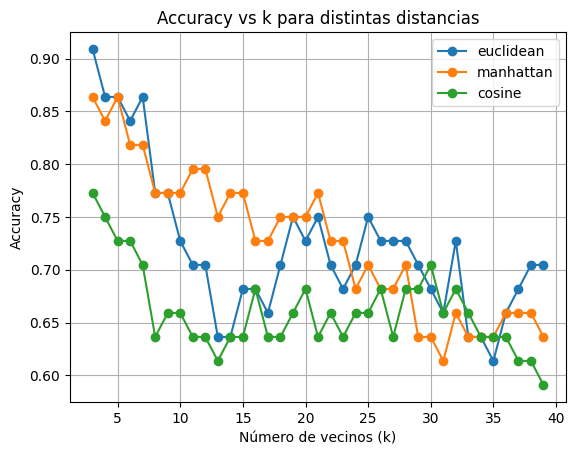

In [ ]:
# Graph 1
for similmeasure in similMeasures:
    # Plot every acurracy vector for each similarity measure
    plt.plot(k_values, Acurracy[similmeasure][0], label=similmeasure, marker="o")

# Graph Settings
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k para distintas distancias")
plt.legend()
plt.grid(True)
plt.show()

##### 4.5.1.2. Matrices de Confusión
Para cada valor de K y cada medida de distancia se generaron matrices de confusión, lo que facilitó analizar qué tipo de errores cometía el clasificador y relacionarlo con su precisión general.

In [ ]:
# Graph 2

# Matrix Label
labels = ["Absence", "Present"]

# Create confusion matrix for each distance measure
for i in similMeasures:
    # Create matrix using (y , y_predicted)
    for k in range( len(k_values)):

        # Manual 2d ConfusionMatrix
        manualCm = calcCondusionMatrix2Categories(Acurracy[i][2], Acurracy[i][1][k])

        # Sklearn confusionMatrix
        cm = confusion_matrix(Acurracy[i][2], Acurracy[i][1][k])

        matrix2Graph = cm

        # Create heatmap
        fig = go.Figure(data=go.Heatmap(
            z=matrix2Graph,
            x=labels,  # Column labels
            y=labels,  # Row labels
            colorscale="Blues",
            text=matrix2Graph,  # Show measures inside boxes
            texttemplate="%{text}",  # Text Format
        ))

        label = f"Matriz de Confusión - Distancia '{i}' - k: {k+(min(k_values))} - Acurracy: {Acurracy[i][0][k]}"

        # Figure settings
        fig.update_layout(
            title=label,
            xaxis_title="Predicción",
            yaxis_title="Real",
            width=1000,
            height=300
        )

        fig.update_yaxes(autorange="reversed")

        print(label)

        # Show graph
        fig.show()


TruthPositive:  19
TruthNegative:  21
FalsePositive:  1
FalseNegative:  3
Matriz de Confusión - Distancia 'euclidean' - k: 3 - Acurracy: 0.9090909090909091


TruthPositive:  16
TruthNegative:  22
FalsePositive:  0
FalseNegative:  6
Matriz de Confusión - Distancia 'euclidean' - k: 4 - Acurracy: 0.8636363636363636


TruthPositive:  19
TruthNegative:  19
FalsePositive:  3
FalseNegative:  3
Matriz de Confusión - Distancia 'euclidean' - k: 5 - Acurracy: 0.8636363636363636


TruthPositive:  15
TruthNegative:  22
FalsePositive:  0
FalseNegative:  7
Matriz de Confusión - Distancia 'euclidean' - k: 6 - Acurracy: 0.8409090909090909


TruthPositive:  19
TruthNegative:  19
FalsePositive:  3
FalseNegative:  3
Matriz de Confusión - Distancia 'euclidean' - k: 7 - Acurracy: 0.8636363636363636


TruthPositive:  15
TruthNegative:  19
FalsePositive:  3
FalseNegative:  7
Matriz de Confusión - Distancia 'euclidean' - k: 8 - Acurracy: 0.7727272727272727


TruthPositive:  16
TruthNegative:  18
FalsePositive:  4
FalseNegative:  6
Matriz de Confusión - Distancia 'euclidean' - k: 9 - Acurracy: 0.7727272727272727


TruthPositive:  14
TruthNegative:  18
FalsePositive:  4
FalseNegative:  8
Matriz de Confusión - Distancia 'euclidean' - k: 10 - Acurracy: 0.7272727272727273


TruthPositive:  14
TruthNegative:  17
FalsePositive:  5
FalseNegative:  8
Matriz de Confusión - Distancia 'euclidean' - k: 11 - Acurracy: 0.7045454545454546


TruthPositive:  12
TruthNegative:  19
FalsePositive:  3
FalseNegative:  10
Matriz de Confusión - Distancia 'euclidean' - k: 12 - Acurracy: 0.7045454545454546


TruthPositive:  12
TruthNegative:  16
FalsePositive:  6
FalseNegative:  10
Matriz de Confusión - Distancia 'euclidean' - k: 13 - Acurracy: 0.6363636363636364


TruthPositive:  12
TruthNegative:  16
FalsePositive:  6
FalseNegative:  10
Matriz de Confusión - Distancia 'euclidean' - k: 14 - Acurracy: 0.6363636363636364


TruthPositive:  14
TruthNegative:  16
FalsePositive:  6
FalseNegative:  8
Matriz de Confusión - Distancia 'euclidean' - k: 15 - Acurracy: 0.6818181818181818


TruthPositive:  13
TruthNegative:  17
FalsePositive:  5
FalseNegative:  9
Matriz de Confusión - Distancia 'euclidean' - k: 16 - Acurracy: 0.6818181818181818


TruthPositive:  14
TruthNegative:  15
FalsePositive:  7
FalseNegative:  8
Matriz de Confusión - Distancia 'euclidean' - k: 17 - Acurracy: 0.6590909090909091


TruthPositive:  12
TruthNegative:  19
FalsePositive:  3
FalseNegative:  10
Matriz de Confusión - Distancia 'euclidean' - k: 18 - Acurracy: 0.7045454545454546


TruthPositive:  14
TruthNegative:  19
FalsePositive:  3
FalseNegative:  8
Matriz de Confusión - Distancia 'euclidean' - k: 19 - Acurracy: 0.75


TruthPositive:  13
TruthNegative:  19
FalsePositive:  3
FalseNegative:  9
Matriz de Confusión - Distancia 'euclidean' - k: 20 - Acurracy: 0.7272727272727273


TruthPositive:  15
TruthNegative:  18
FalsePositive:  4
FalseNegative:  7
Matriz de Confusión - Distancia 'euclidean' - k: 21 - Acurracy: 0.75


TruthPositive:  13
TruthNegative:  18
FalsePositive:  4
FalseNegative:  9
Matriz de Confusión - Distancia 'euclidean' - k: 22 - Acurracy: 0.7045454545454546


TruthPositive:  13
TruthNegative:  17
FalsePositive:  5
FalseNegative:  9
Matriz de Confusión - Distancia 'euclidean' - k: 23 - Acurracy: 0.6818181818181818


TruthPositive:  13
TruthNegative:  18
FalsePositive:  4
FalseNegative:  9
Matriz de Confusión - Distancia 'euclidean' - k: 24 - Acurracy: 0.7045454545454546


TruthPositive:  15
TruthNegative:  18
FalsePositive:  4
FalseNegative:  7
Matriz de Confusión - Distancia 'euclidean' - k: 25 - Acurracy: 0.75


TruthPositive:  14
TruthNegative:  18
FalsePositive:  4
FalseNegative:  8
Matriz de Confusión - Distancia 'euclidean' - k: 26 - Acurracy: 0.7272727272727273


TruthPositive:  15
TruthNegative:  17
FalsePositive:  5
FalseNegative:  7
Matriz de Confusión - Distancia 'euclidean' - k: 27 - Acurracy: 0.7272727272727273


TruthPositive:  14
TruthNegative:  18
FalsePositive:  4
FalseNegative:  8
Matriz de Confusión - Distancia 'euclidean' - k: 28 - Acurracy: 0.7272727272727273


TruthPositive:  15
TruthNegative:  16
FalsePositive:  6
FalseNegative:  7
Matriz de Confusión - Distancia 'euclidean' - k: 29 - Acurracy: 0.7045454545454546


TruthPositive:  14
TruthNegative:  16
FalsePositive:  6
FalseNegative:  8
Matriz de Confusión - Distancia 'euclidean' - k: 30 - Acurracy: 0.6818181818181818


TruthPositive:  14
TruthNegative:  15
FalsePositive:  7
FalseNegative:  8
Matriz de Confusión - Distancia 'euclidean' - k: 31 - Acurracy: 0.6590909090909091


TruthPositive:  14
TruthNegative:  18
FalsePositive:  4
FalseNegative:  8
Matriz de Confusión - Distancia 'euclidean' - k: 32 - Acurracy: 0.7272727272727273


TruthPositive:  14
TruthNegative:  14
FalsePositive:  8
FalseNegative:  8
Matriz de Confusión - Distancia 'euclidean' - k: 33 - Acurracy: 0.6363636363636364


TruthPositive:  12
TruthNegative:  16
FalsePositive:  6
FalseNegative:  10
Matriz de Confusión - Distancia 'euclidean' - k: 34 - Acurracy: 0.6363636363636364


TruthPositive:  13
TruthNegative:  14
FalsePositive:  8
FalseNegative:  9
Matriz de Confusión - Distancia 'euclidean' - k: 35 - Acurracy: 0.6136363636363636


TruthPositive:  13
TruthNegative:  16
FalsePositive:  6
FalseNegative:  9
Matriz de Confusión - Distancia 'euclidean' - k: 36 - Acurracy: 0.6590909090909091


TruthPositive:  14
TruthNegative:  16
FalsePositive:  6
FalseNegative:  8
Matriz de Confusión - Distancia 'euclidean' - k: 37 - Acurracy: 0.6818181818181818


TruthPositive:  14
TruthNegative:  17
FalsePositive:  5
FalseNegative:  8
Matriz de Confusión - Distancia 'euclidean' - k: 38 - Acurracy: 0.7045454545454546


TruthPositive:  14
TruthNegative:  17
FalsePositive:  5
FalseNegative:  8
Matriz de Confusión - Distancia 'euclidean' - k: 39 - Acurracy: 0.7045454545454546


TruthPositive:  18
TruthNegative:  20
FalsePositive:  2
FalseNegative:  4
Matriz de Confusión - Distancia 'manhattan' - k: 3 - Acurracy: 0.8636363636363636


TruthPositive:  15
TruthNegative:  22
FalsePositive:  0
FalseNegative:  7
Matriz de Confusión - Distancia 'manhattan' - k: 4 - Acurracy: 0.8409090909090909


TruthPositive:  18
TruthNegative:  20
FalsePositive:  2
FalseNegative:  4
Matriz de Confusión - Distancia 'manhattan' - k: 5 - Acurracy: 0.8636363636363636


TruthPositive:  15
TruthNegative:  21
FalsePositive:  1
FalseNegative:  7
Matriz de Confusión - Distancia 'manhattan' - k: 6 - Acurracy: 0.8181818181818182


TruthPositive:  17
TruthNegative:  19
FalsePositive:  3
FalseNegative:  5
Matriz de Confusión - Distancia 'manhattan' - k: 7 - Acurracy: 0.8181818181818182


TruthPositive:  14
TruthNegative:  20
FalsePositive:  2
FalseNegative:  8
Matriz de Confusión - Distancia 'manhattan' - k: 8 - Acurracy: 0.7727272727272727


TruthPositive:  15
TruthNegative:  19
FalsePositive:  3
FalseNegative:  7
Matriz de Confusión - Distancia 'manhattan' - k: 9 - Acurracy: 0.7727272727272727


TruthPositive:  14
TruthNegative:  20
FalsePositive:  2
FalseNegative:  8
Matriz de Confusión - Distancia 'manhattan' - k: 10 - Acurracy: 0.7727272727272727


TruthPositive:  15
TruthNegative:  20
FalsePositive:  2
FalseNegative:  7
Matriz de Confusión - Distancia 'manhattan' - k: 11 - Acurracy: 0.7954545454545454


TruthPositive:  14
TruthNegative:  21
FalsePositive:  1
FalseNegative:  8
Matriz de Confusión - Distancia 'manhattan' - k: 12 - Acurracy: 0.7954545454545454


TruthPositive:  14
TruthNegative:  19
FalsePositive:  3
FalseNegative:  8
Matriz de Confusión - Distancia 'manhattan' - k: 13 - Acurracy: 0.75


TruthPositive:  14
TruthNegative:  20
FalsePositive:  2
FalseNegative:  8
Matriz de Confusión - Distancia 'manhattan' - k: 14 - Acurracy: 0.7727272727272727


TruthPositive:  15
TruthNegative:  19
FalsePositive:  3
FalseNegative:  7
Matriz de Confusión - Distancia 'manhattan' - k: 15 - Acurracy: 0.7727272727272727


TruthPositive:  13
TruthNegative:  19
FalsePositive:  3
FalseNegative:  9
Matriz de Confusión - Distancia 'manhattan' - k: 16 - Acurracy: 0.7272727272727273


TruthPositive:  14
TruthNegative:  18
FalsePositive:  4
FalseNegative:  8
Matriz de Confusión - Distancia 'manhattan' - k: 17 - Acurracy: 0.7272727272727273


TruthPositive:  13
TruthNegative:  20
FalsePositive:  2
FalseNegative:  9
Matriz de Confusión - Distancia 'manhattan' - k: 18 - Acurracy: 0.75


TruthPositive:  14
TruthNegative:  19
FalsePositive:  3
FalseNegative:  8
Matriz de Confusión - Distancia 'manhattan' - k: 19 - Acurracy: 0.75


TruthPositive:  14
TruthNegative:  19
FalsePositive:  3
FalseNegative:  8
Matriz de Confusión - Distancia 'manhattan' - k: 20 - Acurracy: 0.75


TruthPositive:  15
TruthNegative:  19
FalsePositive:  3
FalseNegative:  7
Matriz de Confusión - Distancia 'manhattan' - k: 21 - Acurracy: 0.7727272727272727


TruthPositive:  13
TruthNegative:  19
FalsePositive:  3
FalseNegative:  9
Matriz de Confusión - Distancia 'manhattan' - k: 22 - Acurracy: 0.7272727272727273


TruthPositive:  14
TruthNegative:  18
FalsePositive:  4
FalseNegative:  8
Matriz de Confusión - Distancia 'manhattan' - k: 23 - Acurracy: 0.7272727272727273


TruthPositive:  12
TruthNegative:  18
FalsePositive:  4
FalseNegative:  10
Matriz de Confusión - Distancia 'manhattan' - k: 24 - Acurracy: 0.6818181818181818


TruthPositive:  13
TruthNegative:  18
FalsePositive:  4
FalseNegative:  9
Matriz de Confusión - Distancia 'manhattan' - k: 25 - Acurracy: 0.7045454545454546


TruthPositive:  12
TruthNegative:  18
FalsePositive:  4
FalseNegative:  10
Matriz de Confusión - Distancia 'manhattan' - k: 26 - Acurracy: 0.6818181818181818


TruthPositive:  13
TruthNegative:  17
FalsePositive:  5
FalseNegative:  9
Matriz de Confusión - Distancia 'manhattan' - k: 27 - Acurracy: 0.6818181818181818


TruthPositive:  13
TruthNegative:  18
FalsePositive:  4
FalseNegative:  9
Matriz de Confusión - Distancia 'manhattan' - k: 28 - Acurracy: 0.7045454545454546


TruthPositive:  13
TruthNegative:  15
FalsePositive:  7
FalseNegative:  9
Matriz de Confusión - Distancia 'manhattan' - k: 29 - Acurracy: 0.6363636363636364


TruthPositive:  12
TruthNegative:  16
FalsePositive:  6
FalseNegative:  10
Matriz de Confusión - Distancia 'manhattan' - k: 30 - Acurracy: 0.6363636363636364


TruthPositive:  13
TruthNegative:  14
FalsePositive:  8
FalseNegative:  9
Matriz de Confusión - Distancia 'manhattan' - k: 31 - Acurracy: 0.6136363636363636


TruthPositive:  12
TruthNegative:  17
FalsePositive:  5
FalseNegative:  10
Matriz de Confusión - Distancia 'manhattan' - k: 32 - Acurracy: 0.6590909090909091


TruthPositive:  13
TruthNegative:  15
FalsePositive:  7
FalseNegative:  9
Matriz de Confusión - Distancia 'manhattan' - k: 33 - Acurracy: 0.6363636363636364


TruthPositive:  13
TruthNegative:  15
FalsePositive:  7
FalseNegative:  9
Matriz de Confusión - Distancia 'manhattan' - k: 34 - Acurracy: 0.6363636363636364


TruthPositive:  13
TruthNegative:  15
FalsePositive:  7
FalseNegative:  9
Matriz de Confusión - Distancia 'manhattan' - k: 35 - Acurracy: 0.6363636363636364


TruthPositive:  13
TruthNegative:  16
FalsePositive:  6
FalseNegative:  9
Matriz de Confusión - Distancia 'manhattan' - k: 36 - Acurracy: 0.6590909090909091


TruthPositive:  13
TruthNegative:  16
FalsePositive:  6
FalseNegative:  9
Matriz de Confusión - Distancia 'manhattan' - k: 37 - Acurracy: 0.6590909090909091


TruthPositive:  12
TruthNegative:  17
FalsePositive:  5
FalseNegative:  10
Matriz de Confusión - Distancia 'manhattan' - k: 38 - Acurracy: 0.6590909090909091


TruthPositive:  12
TruthNegative:  16
FalsePositive:  6
FalseNegative:  10
Matriz de Confusión - Distancia 'manhattan' - k: 39 - Acurracy: 0.6363636363636364


TruthPositive:  18
TruthNegative:  16
FalsePositive:  6
FalseNegative:  4
Matriz de Confusión - Distancia 'cosine' - k: 3 - Acurracy: 0.7727272727272727


TruthPositive:  13
TruthNegative:  20
FalsePositive:  2
FalseNegative:  9
Matriz de Confusión - Distancia 'cosine' - k: 4 - Acurracy: 0.75


TruthPositive:  16
TruthNegative:  16
FalsePositive:  6
FalseNegative:  6
Matriz de Confusión - Distancia 'cosine' - k: 5 - Acurracy: 0.7272727272727273


TruthPositive:  14
TruthNegative:  18
FalsePositive:  4
FalseNegative:  8
Matriz de Confusión - Distancia 'cosine' - k: 6 - Acurracy: 0.7272727272727273


TruthPositive:  15
TruthNegative:  16
FalsePositive:  6
FalseNegative:  7
Matriz de Confusión - Distancia 'cosine' - k: 7 - Acurracy: 0.7045454545454546


TruthPositive:  12
TruthNegative:  16
FalsePositive:  6
FalseNegative:  10
Matriz de Confusión - Distancia 'cosine' - k: 8 - Acurracy: 0.6363636363636364


TruthPositive:  14
TruthNegative:  15
FalsePositive:  7
FalseNegative:  8
Matriz de Confusión - Distancia 'cosine' - k: 9 - Acurracy: 0.6590909090909091


TruthPositive:  12
TruthNegative:  17
FalsePositive:  5
FalseNegative:  10
Matriz de Confusión - Distancia 'cosine' - k: 10 - Acurracy: 0.6590909090909091


TruthPositive:  14
TruthNegative:  14
FalsePositive:  8
FalseNegative:  8
Matriz de Confusión - Distancia 'cosine' - k: 11 - Acurracy: 0.6363636363636364


TruthPositive:  13
TruthNegative:  15
FalsePositive:  7
FalseNegative:  9
Matriz de Confusión - Distancia 'cosine' - k: 12 - Acurracy: 0.6363636363636364


TruthPositive:  13
TruthNegative:  14
FalsePositive:  8
FalseNegative:  9
Matriz de Confusión - Distancia 'cosine' - k: 13 - Acurracy: 0.6136363636363636


TruthPositive:  12
TruthNegative:  16
FalsePositive:  6
FalseNegative:  10
Matriz de Confusión - Distancia 'cosine' - k: 14 - Acurracy: 0.6363636363636364


TruthPositive:  14
TruthNegative:  14
FalsePositive:  8
FalseNegative:  8
Matriz de Confusión - Distancia 'cosine' - k: 15 - Acurracy: 0.6363636363636364


TruthPositive:  13
TruthNegative:  17
FalsePositive:  5
FalseNegative:  9
Matriz de Confusión - Distancia 'cosine' - k: 16 - Acurracy: 0.6818181818181818


TruthPositive:  14
TruthNegative:  14
FalsePositive:  8
FalseNegative:  8
Matriz de Confusión - Distancia 'cosine' - k: 17 - Acurracy: 0.6363636363636364


TruthPositive:  14
TruthNegative:  14
FalsePositive:  8
FalseNegative:  8
Matriz de Confusión - Distancia 'cosine' - k: 18 - Acurracy: 0.6363636363636364


TruthPositive:  15
TruthNegative:  14
FalsePositive:  8
FalseNegative:  7
Matriz de Confusión - Distancia 'cosine' - k: 19 - Acurracy: 0.6590909090909091


TruthPositive:  15
TruthNegative:  15
FalsePositive:  7
FalseNegative:  7
Matriz de Confusión - Distancia 'cosine' - k: 20 - Acurracy: 0.6818181818181818


TruthPositive:  15
TruthNegative:  13
FalsePositive:  9
FalseNegative:  7
Matriz de Confusión - Distancia 'cosine' - k: 21 - Acurracy: 0.6363636363636364


TruthPositive:  15
TruthNegative:  14
FalsePositive:  8
FalseNegative:  7
Matriz de Confusión - Distancia 'cosine' - k: 22 - Acurracy: 0.6590909090909091


TruthPositive:  15
TruthNegative:  13
FalsePositive:  9
FalseNegative:  7
Matriz de Confusión - Distancia 'cosine' - k: 23 - Acurracy: 0.6363636363636364


TruthPositive:  15
TruthNegative:  14
FalsePositive:  8
FalseNegative:  7
Matriz de Confusión - Distancia 'cosine' - k: 24 - Acurracy: 0.6590909090909091


TruthPositive:  16
TruthNegative:  13
FalsePositive:  9
FalseNegative:  6
Matriz de Confusión - Distancia 'cosine' - k: 25 - Acurracy: 0.6590909090909091


TruthPositive:  15
TruthNegative:  15
FalsePositive:  7
FalseNegative:  7
Matriz de Confusión - Distancia 'cosine' - k: 26 - Acurracy: 0.6818181818181818


TruthPositive:  15
TruthNegative:  13
FalsePositive:  9
FalseNegative:  7
Matriz de Confusión - Distancia 'cosine' - k: 27 - Acurracy: 0.6363636363636364


TruthPositive:  15
TruthNegative:  15
FalsePositive:  7
FalseNegative:  7
Matriz de Confusión - Distancia 'cosine' - k: 28 - Acurracy: 0.6818181818181818


TruthPositive:  16
TruthNegative:  14
FalsePositive:  8
FalseNegative:  6
Matriz de Confusión - Distancia 'cosine' - k: 29 - Acurracy: 0.6818181818181818


TruthPositive:  16
TruthNegative:  15
FalsePositive:  7
FalseNegative:  6
Matriz de Confusión - Distancia 'cosine' - k: 30 - Acurracy: 0.7045454545454546


TruthPositive:  16
TruthNegative:  13
FalsePositive:  9
FalseNegative:  6
Matriz de Confusión - Distancia 'cosine' - k: 31 - Acurracy: 0.6590909090909091


TruthPositive:  15
TruthNegative:  15
FalsePositive:  7
FalseNegative:  7
Matriz de Confusión - Distancia 'cosine' - k: 32 - Acurracy: 0.6818181818181818


TruthPositive:  15
TruthNegative:  14
FalsePositive:  8
FalseNegative:  7
Matriz de Confusión - Distancia 'cosine' - k: 33 - Acurracy: 0.6590909090909091


TruthPositive:  14
TruthNegative:  14
FalsePositive:  8
FalseNegative:  8
Matriz de Confusión - Distancia 'cosine' - k: 34 - Acurracy: 0.6363636363636364


TruthPositive:  14
TruthNegative:  14
FalsePositive:  8
FalseNegative:  8
Matriz de Confusión - Distancia 'cosine' - k: 35 - Acurracy: 0.6363636363636364


TruthPositive:  13
TruthNegative:  15
FalsePositive:  7
FalseNegative:  9
Matriz de Confusión - Distancia 'cosine' - k: 36 - Acurracy: 0.6363636363636364


TruthPositive:  13
TruthNegative:  14
FalsePositive:  8
FalseNegative:  9
Matriz de Confusión - Distancia 'cosine' - k: 37 - Acurracy: 0.6136363636363636


TruthPositive:  13
TruthNegative:  14
FalsePositive:  8
FalseNegative:  9
Matriz de Confusión - Distancia 'cosine' - k: 38 - Acurracy: 0.6136363636363636


TruthPositive:  13
TruthNegative:  13
FalsePositive:  9
FalseNegative:  9
Matriz de Confusión - Distancia 'cosine' - k: 39 - Acurracy: 0.5909090909090909


##### 4.5.1.3. Preparación para Gráficos de Rendimiento
A continuación se presenta la implementación de las funciones que permiten realizar los calculos de "precision" y "recall" para un vector de Y verdaderas y Y predichas dado.

In [ ]:
"""
Define a Python function that given a vetor with every Y predicted and a vector with the real Y, calculates the model's precision in terms of  TP/(TP+FP)
Inputs:
- Y_truh : list
- Y-pred : list
Output:
- Precision : float()
"""
def calcPrecision(Y_truh, Y_pred):
    TruthPositive = 0
    FalsePositive = 0

    for y_truth, y_pred in zip(Y_truh, Y_pred):
        if(y_truth == "Present" and y_pred == "Present"): # Truth Positive
            TruthPositive+=1
        elif(y_truth == "Absence" and y_pred == "Present"): # FAlse Positive
            FalsePositive+=1

    # Calculate Precision as TP/(TP+FP)
    precision = TruthPositive/(TruthPositive + FalsePositive)

    return precision

"""
Define a Python function that given a vetor with every Y predicted and a vector with the real Y, calculates the model's recall in terms of TP/(TP+FN)
Inputs:
- Y_truh : list
- Y-pred : list
Output:
- recall : float()
"""
def calcRecall(Y_truh, Y_pred):
    TruthPositive = 0
    FalseNegative = 0

    for y_truth, y_pred in zip(Y_truh, Y_pred):
        if(y_truth == "Present" and y_pred == "Present"): # Truth Positive
            TruthPositive+=1
        elif(y_truth == "Present" and y_pred == "Absence"): # False Negative
            FalseNegative+=1

    # Calculate Precision as TP/(TP+FN)
    recall = TruthPositive/(TruthPositive+FalseNegative)

    return recall

En el siguinte código se construye el dataframe que será de utilidad para realizar los gráficos correspondientes utilziando cada una de las métricas calculadas para todas las combinaciones evaluadas, siendo variables K, Medida de Similitud Utilizada, Precision y Recall para cada una de las iteraciones.

In [ ]:
# Define pandas dataframe structure for metrics storage
data = {
    "k": [],
    "distance": [],
    "precision": [],
    "recall": []
}

# Create confusion matrix for each distance measure
for sMeasure in similMeasures:
    # Create matrix using (y , y_predicted)
    for k in range( len(k_values)):
        y_truth = Acurracy[sMeasure][2]
        y_predicted = Acurracy[sMeasure][1][k]

        # Append data to data struct
        data["distance"].append(sMeasure)
        data["k"].append(k+(min(k_values)))
        data["precision"].append(calcPrecision(y_truth, y_predicted))
        data["recall"].append(calcRecall(y_truth, y_predicted))

# Create pandas dataframe
df = pd.DataFrame(data)


##### 4.5.1.4. Gráfico de Precision vs K_values por Medida de Similitud
Se graficó la precisión en función de K para cada medida de similitud. Este gráfico mostró cómo el clasificador tiende a volverse más preciso con ciertos valores de K y a medida que incrementa K se pierde esta precisión.

In [ ]:
# Graph3
# Plot precision through every k_value tested using each SimilMeasure
fig = px.line(df, x="k", y="precision", color="distance",
              markers=True, title="Precision vs K")
fig.show()


##### 4.5.1.5. Gráfico de Recall vs K_values por Medida de Similitud
De manera similar, se graficó el recall en función de K, lo que permitió analizar si el modelo era capaz de detectar adecuadamente los casos verdaderamente positivos de enfermedad.

In [ ]:
# Graph4
# Plot recall through every k_value tested using each SimilMeasure
fig = px.line(df, x="k", y="recall", color="distance",
              markers=True, title="Recall vs K")
fig.show()



# 5. **Resultados y Hallazgos**

1. **Implementación Manual**

    - Resultó eficiente el balanceo de muestras de acuerdo con las categorías y aplicar shuffle a los conjuntos de prueba y entrenamiento, garantizando una correcta distribución de los datos.

    - Considerando el vector de características completo y probando un rango de K entre 3 y 39, se obtuvieron los siguientes resultados principales:

        - **Euclidean: 0.90 con K=4**

        - **Manhattan: 0.9166 con K=4**

        - **Coseno: 0.48 con K=3**

    - En la gráfica de accuracy vs K se aprecia que la distancia Manhattan fue la más eficiente, aunque con valores de K grandes su desempeño se desestabiliza rápidamente. La euclidiana presentó un comportamiento similar, mientras que la coseno resultó claramente ineficiente (con valores menores a 0.5 de accuracy).

    - La mejor medida fue Manhattan con K=4, logrando un accuracy = 0.9166. La matriz de confusión fue:

        -  **TP: 27, TN: 28, FP: 2, FN: 3.**
        Esto refleja un modelo con muy buen rendimiento y bajo nivel de error.

    - Al realizar pruebas iterativas eliminando una característica del dataset, se observaron hallazgos relevantes:

        - Algunas características como **Edad y Presión Arterial, al ser eliminadas, incluso mejoraron el rendimiento del modelo (0.9166 y 0.9333 de accuracy respectivamente).**

        - En contraste, la **eliminación de variables como Colesterol redujo notablemente la eficiencia del modelo (accuracy de 0.85 en euclidiana y 0.80 en manhattan)**, lo cuál habla de su alta significancia con respecto al resto de características.

        - Esto sugiere que no todas las variables tienen la misma significancia en el vector de características: algunas aportan información redundante, mientras que otras como Colesterol y Dolor de Pecho parecen más relevantes.


2. **Implementación con scikit-learn**

    - Al igual que en la implementación manual, resultó eficiente el balanceo de muestras y el barajado de datos en los conjuntos de prueba y entrenamiento.

    - Probando con el vector completo de características y un rango de K entre 3 y 39, los resultados fueron:

        - **Euclidean: 0.9090 con K=3**

        - **Manhattan: 0.8636 con K=3**

        - **Coseno: 0.7727 con K=3**

    - En la gráfica de accuracy vs K se observa que la euclidiana fue la más efectiva, aunque su estabilidad también disminuye con K grandes. La manhattan presentó un comportamiento similar, mientras que coseno nuevamente fue la menos eficiente, aunque en comparación con la implementación manual mostró un mejor desempeño (probablemente debido a optimizaciones internas de la librería).

    - La mejor medida fue Euclidiana con K=3, obteniendo un accuracy = 0.9090. La matriz de confusión fue:

        - **TP: 19, TN: 21, FP: 1, FN: 3.**
        Aunque el rendimiento es ligeramente inferior al mejor caso de la implementación manual, el resultado sigue siendo robusto.

    - En la gráfica de precisión (TP / (TP+FP)), se aprecia que tanto Manhattan como Euclidiana alcanzaron **precision = 1 para K=4 y K=6**, lo que indica que en esas configuraciones el modelo logra clasificar sin generar falsos positivos. Esto refleja escenarios de alta confianza en las predicciones positivas.

    - En la gráfica de recall (TP / (TP+FN)), la distancia Euclidiana fue la que obtuvo los valores más altos para **recall en K=3, 5 y 7**, lo que sugiere que esta medida favorece la correcta detección de positivos en configuraciones de K bajas, siendo más sensible para la identificación de casos positivos que las otras métricas.

Ambas implementaciones muestran resultados consistentes, con Manhattan ligeramente superior en la versión manual y Euclidiana en la versión scikit-learn. La métrica coseno, aunque optimizada en la librería, sigue siendo poco eficiente en este dataset. Además, los experimentos eliminando variables revelan que no todas las características aportan valor significativo, lo cual abre la posibilidad de optimizar el modelo mediante reducción de dimensionalidad para el vector de características.


# 6. **Conclusión**
La actividad desarrollada permitió profundizar en múltiples aspectos conceptuales y prácticos del aprendizaje supervisado, particularmente en la implementación y análisis del algoritmo K-Nearest Neighbors. Uno de los aprendizajes más relevantes fue la comprensión de cómo el preprocesamiento de datos (como el balanceo de clases y la aleatorización de los conjuntos de entrenamiento y prueba) influye directamente en la capacidad del modelo para generalizar de manera efectiva. Esto refuerza la importancia de no subestimar las etapas iniciales de limpieza y preparación de datos en cualquier proyecto de análisis o minería de datos.

Asimismo, la actividad evidenció la influencia de la elección de la métrica de distancia y del parámetro K sobre el desempeño del modelo, permitiendo apreciar cómo pequeñas variaciones pueden alterar significativamente la precisión, la sensibilidad y la robustez de las predicciones. Este tipo de experimentación favorece la formación de un criterio crítico para seleccionar configuraciones óptimas según las características del conjunto de datos, un aprendizaje esencial en la práctica profesional de ciencia de datos e inteligencia artificial.

Otro aspecto importante fue la exploración de la relevancia de las características dentro del conjunto de datos. La eliminación sistemática de atributos permitió identificar variables redundantes o poco significativas frente a otras que aportan información clave para la clasificación. Esta experiencia fortalece la comprensión de la necesidad de aplicar análisis de importancia de variables y selección de características, habilidades fundamentales para optimizar modelos.

Finalmente, se destaca el valor de emplear métricas complementarias al accuracy, como precisión y recall, para evaluar de manera más completa la capacidad predictiva de un modelo. Este enfoque permite comprender mejor las fortalezas y limitaciones del algoritmo en contextos distintos, así como tomar decisiones más informadas respecto a su aplicación en escenarios reales.Esta actividad no solo consolidó conocimientos técnicos sobre KNN y scikit-learn, sino que también reforzó competencias analíticas, de interpretación de resultados y de pensamiento crítico frente a decisiones de diseño de modelos, aprendizajes que son transferibles a un amplio rango de problemas en aprendizaje automático y ciencia de datos.

Referencias:
- https://www-ibm-com.translate.goog/think/topics/cosine-similarity?_x_tr_sl=en&_x_tr_tl=es&_x_tr_hl=es&_x_tr_pto=tc